In [31]:
from langchain_groq.chat_models import ChatGroq
import pandas as pd
import os
from google.colab import files
from google.colab import userdata

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":
               "llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

os.environ['api_key'] = userdata.get('ml_task4_key')

uploaded = files.upload()
filename = next(iter(uploaded))

data = pd.read_csv(filename)

row = data.iloc[20]
row_str = row.to_string(index = False)

'''def create_query(data_str):
    query = f''
    You are a machine learning model expert.
    Your task is to analyze the given featurized accelerometer data and predict the human activity.
    The data is provided below in a featurized format.
    Provide the predicted activity label and, if necessary, a brief explanation of your reasoning.

    Few examples are provided for your reference:
    Few-Shot Examples:
      Example 1:
      Featurized Data:
      - X-axis: oscillations between -18.73 to 9.27
      - Y-axis: oscillations between -11.50 to 4.73
      - Z-axis: oscillations between -7.28 to 12.68
      - Total acceleration: oscillations between -20.00 to 15.00
      Activity: WALKING

      Example 2:
      Featurized Data:
      - X-axis: Higher oscillations between -10.65 to 12.59
      - Y-axis: Moderate oscillations between -16.89 to 7.51
      - Z-axis: Higher oscillations between -8.81 to 11.36
      - Total acceleration: oscillations between -18.00 to 14.00
      Activity: WALKING_UPSTAIRS

      Example 3:
      Featurized Data:
      - X-axis: oscillations between -10.80 to 10.05
      - Y-axis: Higher variability between -14.38 to 6.04
      - Z-axis: Higher variability between -8.88 to 11.81
      - Total acceleration: oscillations between -22.00 to 16.00
      Activity: WALKING_DOWNSTAIRS

      Example 4:
      Featurized Data:
      - X-axis: Low values between -1.44 to 0.94
      - Y-axis: Low values between -2.87 to 1.45
      - Z-axis: Low values between -1.58 to 2.08
      - Total acceleration: Low values between -4.00 to 3.00
      Activity: SITTING

      Example 5:
      Featurized Data:
      - X-axis: Low values between -1.44 to 1.85
      - Y-axis: Low but stable values between -1.22 to 0.69
      - Z-axis: Low values between -1.20 to 1.14
      - Total acceleration: Low values between -2.00 to 2.50
      Activity: STANDING

      Example 6:
      Featurized Data:
      - X-axis: Very low values close to 0, between -2.87 to 1.26
      - Y-axis: Very low values close to 0, between -1.64 to 2.89
      - Z-axis: Very low values close to 0, between -2.15 to 1.37
      - Total acceleration: Very low values between -3.00 to 3.00
      Activity: LAYING

      Featurized Data:
      {row_str}
    ''
    return query

'''

def create_query(data_str):
    query = f'''
    You are a machine learning model expert.
    Your task is to analyze the given featurized accelerometer data and predict the human activity.
    The data is provided below in a featurized format.
    Provide only the predicted activity label as a single word, with no explanation or additional text.

    Few examples are provided for your reference:
    Few-Shot Examples:
      Example 1:
      Featurized Data:
      - X-axis: oscillations between -18.73 to 9.27
      - Y-axis: oscillations between -11.50 to 4.73
      - Z-axis: oscillations between -7.28 to 12.68
      - Total acceleration: oscillations between -20.00 to 15.00
      Activity: WALKING

      Example 2:
      Featurized Data:
      - X-axis: Higher oscillations between -10.65 to 12.59
      - Y-axis: Moderate oscillations between -16.89 to 7.51
      - Z-axis: Higher oscillations between -8.81 to 11.36
      - Total acceleration: oscillations between -18.00 to 14.00
      Activity: WALKING_UPSTAIRS

      Example 3:
      Featurized Data:
      - X-axis: oscillations between -10.80 to 10.05
      - Y-axis: Higher variability between -14.38 to 6.04
      - Z-axis: Higher variability between -8.88 to 11.81
      - Total acceleration: oscillations between -22.00 to 16.00
      Activity: WALKING_DOWNSTAIRS

      Example 4:
      Featurized Data:
      - X-axis: Low values between -1.44 to 0.94
      - Y-axis: Low values between -2.87 to 1.45
      - Z-axis: Low values between -1.58 to 2.08
      - Total acceleration: Low values between -4.00 to 3.00
      Activity: SITTING

      Example 5:
      Featurized Data:
      - X-axis: Low values between -1.44 to 1.85
      - Y-axis: Low but stable values between -1.22 to 0.69
      - Z-axis: Low values between -1.20 to 1.14
      - Total acceleration: Low values between -2.00 to 2.50
      Activity: STANDING

      Example 6:
      Featurized Data:
      - X-axis: Very low values close to 0, between -2.87 to 1.26
      - Y-axis: Very low values close to 0, between -1.64 to 2.89
      - Z-axis: Very low values close to 0, between -2.15 to 1.37
      - Total acceleration: Very low values between -3.00 to 3.00
      Activity: LAYING

      Featurized Data:
      {data_str}
    '''
    return query

query = create_query(row_str)
model_name = 'llama3-70b'
llm = ChatGroq(model=groq_models[model_name], api_key=os.environ["api_key"], temperature=0)   #The LLM pipeline here.
answer = llm.invoke(query)

print(answer.content)                     # Prints the LLM's response




Saving linear_acc.csv to linear_acc (9).csv
WALKING


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Saving sampled_linear_acc_data_with_task.csv to sampled_linear_acc_data_with_task (12).csv
Predictions and true labels have been saved to predictions_comparison.csv
Unique true labels: {'climbing_up', 'walking', 'laying', 'climbing_down', 'sitting', 'standing'}
Unique predictions: {'walking', 'standing'}
Classification Report:
               precision    recall  f1-score   support

climbing_down       0.00      0.00      0.00        20
  climbing_up       0.00      0.00      0.00        11
       laying       0.00      0.00      0.00         6
      sitting       0.00      0.00      0.00         6
     standing       0.00      0.00      0.00         3
      walking       0.09      0.75      0.16         4

     accuracy                           0.06        50
    macro avg       0.02      0.12      0.03        50
 weighted avg       0.01      0.06      0.01        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


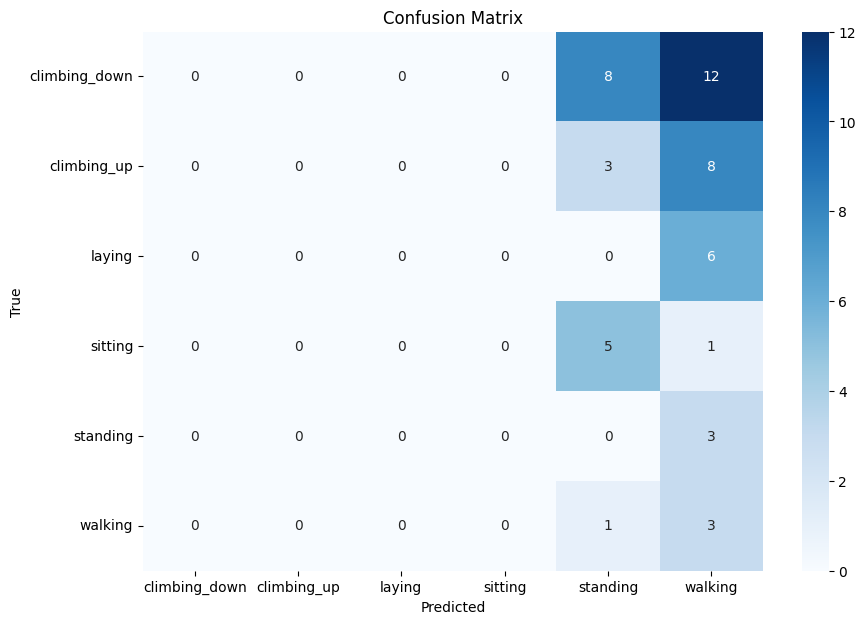

In [29]:
import time
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



# Load the CSV file
uploaded = files.upload()
filename = next(iter(uploaded))
data = pd.read_csv(filename)

# Drop the 'task' column to get features
data_features = data.drop(columns=['task'])

# Get true labels
true_labels = data['task']

# Normalize true labels to lowercase
true_labels = true_labels.str.lower()

# Get a random sample of  rows
sample_data = data_features.sample(n=50, random_state=42)
true_labels_sample = data.loc[sample_data.index, 'task']

# Normalize true labels sample to lowercase
true_labels_sample = true_labels_sample.str.lower()

# Predictions list
predictions = []

# Function to handle retries for model invocation
def predict_with_retries(query, retries=5, base_delay=5):
    for attempt in range(retries):
        try:
            answer = llm.invoke(query)
            return answer.content.strip().lower()  # Normalize prediction to lowercase
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            time.sleep(base_delay * (2 ** attempt))  # Exponential backoff
    raise Exception("Failed to get a response from the model after several retries.")

# Predict for each row
for index, row in sample_data.iterrows():
    row_str = row.to_string(index=False)
    query = create_query(row_str)
    try:
        prediction = predict_with_retries(query)
        predictions.append(prediction)
    except Exception as e:
        print(f"Error for row {index}: {e}")
        predictions.append("unknown")  # Placeholder for failed predictions

# Save predictions to a DataFrame
results_df = pd.DataFrame({
    'True Label': true_labels_sample,
    'Prediction': predictions
})

# Save results to a CSV file
results_filename = 'predictions_comparison.csv'
results_df.to_csv(results_filename, index=False)

print(f"Predictions and true labels have been saved to {results_filename}")

# Print unique labels to diagnose the issue
print("Unique true labels:", set(true_labels_sample))
print("Unique predictions:", set(predictions))

# Define the actual labels based on true labels
actual_labels = sorted(set(true_labels_sample))
predicted_labels = sorted(set(predictions))

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels_sample, predictions, labels=actual_labels)
class_report = classification_report(true_labels_sample, predictions, labels=actual_labels)

# Print classification report
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actual_labels, yticklabels=actual_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
